<div style="color:#FFFFFF;background-color:Red;text-align:center;padding-top: 50px; padding-right: 30px; padding-bottom: 50px; padding-left: 80px;border-radius:10px 10px 10px 10px;">
    <h1>
        Assignment 8: Decision Tree On Donor Choose
    </h1>
</div>

ssignment 8: DT



### [Task-1] 
#### [1] Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets
- Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)
- Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)
- Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)
- Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)


<h4> [2] Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</h4>

- Find the best hyper parameter which will give the maximum AUC value
- Find the best hyper paramter using k-fold cross validation or simple cross validation data
- Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning

#### [3] Graphviz
- Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.
- Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz
- Make sure to print the words in each node of the decision tree instead of printing its index.
- Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.

#### Representation of results
- You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure 
- Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test. 
- Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points 
- Once after you plot the confusion matrix with the test data, get all the `false positive data points`
- Plot the WordCloud WordCloud
- Plot the box plot with the `price` of these `false positive data points`
- Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

#### [Task-2]
- Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3

#### Conclusion
- You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library (Geeks for Geeks )<a href="https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/"> Link </a>


#### Note: Data Leakage
- There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
- To avoid the issue of data-leakage, make sure to split your data first and then vectorize it.
- While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
- For more details please go through this link. <a href="https://machinelearningmastery.com/data-preparation-without-data-leakage/"> Link </a>

<div style="color:#FFFFFF;background-color:Red;text-align:center;padding-top: 50px; padding-right: 30px; padding-bottom: 50px; padding-left: 80px;border-radius:10px 10px 10px 10px;">
    <h1>
        Assignment 8: We start here
    </h1>
</div>

## [1] Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


df= pd.read_csv(r"C:\Users\Faizan_Shakeel\Desktop\Notebooks\Module 3\M302 KNN\Preprocessed_DonorsChoose_dataset.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   school_state                                  109248 non-null  object 
 3   project_grade_category                        109248 non-null  object 
 4   project_subject_categories                    109248 non-null  object 
 5   project_subject_subcategories                 109248 non-null  object 
 6   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 7   project_is_approved                           109248 non-null  int64  
 8   price                                         109248 non-null  float64
 9   quantity                                      10

In [3]:
df.head(3)

,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,p253737,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,154.60,23,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...,0
1,p258326,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,299.00,1,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...,0
2,p182444,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,516.85,22,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...,0


In [4]:
#Features Basic Details inspections
a= df.columns

for i in range (0,len(a)):
    print(a[i])
    print(f"Cardinality: {df[a[i]].nunique()}")
    print(f"Number of null values: {df[a[i]].isnull().sum()}")
    print(f"DataType: {df[a[i]].dtype}")
    print("=="*30)
    print()

id
Cardinality: 109248
Number of null values: 0
DataType: object

teacher_prefix
Cardinality: 5
Number of null values: 0
DataType: object

school_state
Cardinality: 51
Number of null values: 0
DataType: object

project_grade_category
Cardinality: 4
Number of null values: 0
DataType: object

project_subject_categories
Cardinality: 51
Number of null values: 0
DataType: object

project_subject_subcategories
Cardinality: 401
Number of null values: 0
DataType: object

teacher_number_of_previously_posted_projects
Cardinality: 374
Number of null values: 0
DataType: int64

project_is_approved
Cardinality: 2
Number of null values: 0
DataType: int64

price
Cardinality: 45242
Number of null values: 0
DataType: float64

quantity
Cardinality: 332
Number of null values: 0
DataType: int64

cleaned_titles
Cardinality: 91442
Number of null values: 43
DataType: object

cleaned_essays
Cardinality: 108314
Number of null values: 0
DataType: object

cleaned_summary
Cardinality: 107885
Number of null values:

In [5]:
#sampling 40% data for this assignemnt
df.shape
df1 = df.sample(frac=0.40)
df1.shape

(43699, 14)

In [6]:
y= df1['project_is_approved']
df1.drop(columns=['project_is_approved'], inplace= True)

print(df1.shape)
df1.head(3)

(43699, 13)


,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
51488,p160747,mr,ut,grades_3_5,music_arts,visualarts,6,411.81,56,hooper elementary school art project,elementary school 650 students every single on...,students_need_art_supplies_create_large_collab...,0
13684,p014173,ms,ny,grades_prek_2,health_sports,health_wellness,60,495.84,35,daily fitness equals long term goals,amazing group students come walks life energet...,students_need_bean_bags_2_exercise_balls_seeds...,1
2833,p144457,ms,nc,grades_prek_2,literacy_language_math_science,literacy_mathematics,0,356.85,1,room 204 learning floor,teach title school rural north carolina 100 pe...,students_need_carpet_place_work_learn_collabor...,0


# [2] Feturizations

we already have preprocesses data, and can we done using [Amazon Fine Food Review Chapter is detail}

In [7]:
# Before Feturizaton, it's good practice to split data in test and train to avoid [Data Leakge]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df1, y, test_size=0.20, random_state=42)
X_train, X_cv, y_train, y_cv= train_test_split( X_train, y_train, test_size=0.10, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Cross Val data shape:", X_cv.shape, y_cv.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (31463, 13) (31463,)
Cross Val data shape: (3496, 13) (3496,)
Test data shape: (8740, 13) (8740,)


### Handling skewness -oversampling traing data

In [8]:
print("Training target variable distribution:\n", y_train.value_counts())

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)


print(y_train.value_counts())
print(X_train.shape)

Training target variable distribution:
 1    26703
0     4760
Name: project_is_approved, dtype: int64
1    26703
0    26703
Name: project_is_approved, dtype: int64
(53406, 13)


### 2.1 Handling Numarical Features

In [9]:
# 1 Getting list of numarical features
def get_numerical_columns(df):
    numerical_cols = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            numerical_cols.append(col)
    return numerical_cols

num_cols= get_numerical_columns(X_train)
print(num_cols)

['teacher_number_of_previously_posted_projects', 'price', 'quantity', 'isdigit_summary']


array([[<Axes: title={'center': 'teacher_number_of_previously_posted_projects'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'isdigit_summary'}>]], dtype=object)

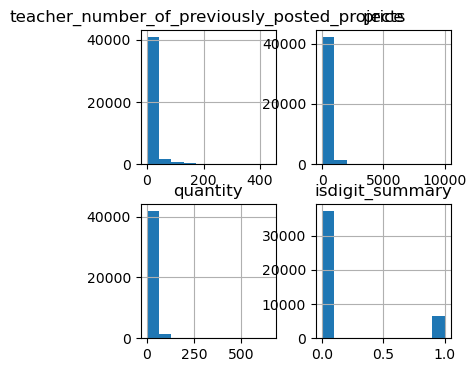

In [12]:
#checking distributions of numarical features
df1[num_cols].hist(figsize=(4,4))

In [13]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

scalar.fit(X_train[num_cols]) #fit has happen on only train data

X_train_nc_scaled = scalar.transform(X_train[num_cols])
X_test_nc_scaled  = scalar.transform(X_test[num_cols])
X_cv_nc_scaled    = scalar.transform(X_cv[num_cols])

In [14]:
#converting all to csr matrix, later use hstack
from scipy.sparse import hstack, csr_matrix

X_train_nc_scaled_csr = csr_matrix(X_train_nc_scaled)
X_test_nc_scaled_csr  = csr_matrix(X_test_nc_scaled)
X_cv_nc_scaled_csr    = csr_matrix(X_cv_nc_scaled)

### 2.1 Handling Categorical Features

In [15]:
# 1 Getting list of categroical features
def get_categorical_columns(df):
    cat_cols = []
    for i in df.columns:
        if df[i].dtype in ['object'] and df[i].nunique()< 405:
            cat_cols.append(i)
    return cat_cols

Cat_cols= get_categorical_columns(df)
print(Cat_cols)

['teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories']


In [16]:
a= Cat_cols
for i in range (0,len(a)):
    print(a[i])
    print(f"Cardinality: {df[a[i]].nunique()}")
    print(f"Number of null values: {df[a[i]].isnull().sum()}")
    print(f"DataType: {df[a[i]].dtype}")
    print("=="*30)
    print()

teacher_prefix
Cardinality: 5
Number of null values: 0
DataType: object

school_state
Cardinality: 51
Number of null values: 0
DataType: object

project_grade_category
Cardinality: 4
Number of null values: 0
DataType: object

project_subject_categories
Cardinality: 51
Number of null values: 0
DataType: object

project_subject_subcategories
Cardinality: 401
Number of null values: 0
DataType: object



<b> Using Countvectorizor to do ohe (one hot encoding)

In [17]:
print(Cat_cols)

['teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories']


In [18]:
#teacher_prefix -tp
from sklearn.feature_extraction.text import CountVectorizer
cvect_tp = CountVectorizer()

cvect_tp.fit(X_train[Cat_cols[0]])

train_tp_ohe = cvect_tp.transform(X_train[Cat_cols[0]])
test_tp_ohe = cvect_tp.transform(X_test[Cat_cols[0]])
cv_tp_ohe = cvect_tp.transform(X_cv[Cat_cols[0]])

In [19]:
#'school_state' -ss
from sklearn.feature_extraction.text import CountVectorizer
cvect_ss = CountVectorizer()

cvect_ss.fit(X_train[Cat_cols[1]])

train_ss_ohe = cvect_ss.transform(X_train[Cat_cols[1]])
test_ss_ohe = cvect_ss.transform(X_test[Cat_cols[1]])
cv_ss_ohe = cvect_ss.transform(X_cv[Cat_cols[1]])

In [20]:
#'project_grade_category"-pgc
from sklearn.feature_extraction.text import CountVectorizer
cvect_pgc = CountVectorizer()

cvect_pgc.fit(X_train[Cat_cols[2]])    #fit has happen on train data only

train_pgc_ohe = cvect_pgc.transform(X_train[Cat_cols[2]])
test_pgc_ohe = cvect_pgc.transform(X_test[Cat_cols[2]])
cv_pgc_ohe = cvect_pgc.transform(X_cv[Cat_cols[2]])

print(train_pgc_ohe.shape, test_pgc_ohe.shape, cv_pgc_ohe.shape)

(53406, 4) (8740, 4) (3496, 4)


In [21]:
# 'project_subject_categories'-psc
cvect_psc = CountVectorizer()

cvect_psc.fit(X_train[Cat_cols[3]])    #fit has happen on train data only

train_psc_ohe = cvect_psc.transform(X_train[Cat_cols[3]])
test_psc_ohe = cvect_psc.transform(X_test[Cat_cols[3]])
cv_psc_ohe = cvect_psc.transform(X_cv[Cat_cols[3]])

print(train_psc_ohe.shape, test_psc_ohe.shape, cv_psc_ohe.shape)

(53406, 51) (8740, 51) (3496, 51)


In [22]:
# 'project_subject_subcategories'- pssc
cvect_pssc = CountVectorizer()

cvect_pssc.fit(X_train[Cat_cols[4]])    #fit has happen on train data only

train_pssc_ohe = cvect_pssc.transform(X_train[Cat_cols[4]])
test_pssc_ohe = cvect_pssc.transform(X_test[Cat_cols[4]])
cv_pssc_ohe = cvect_pssc.transform(X_cv[Cat_cols[4]])

print(train_pssc_ohe.shape, test_pssc_ohe.shape, cv_pssc_ohe.shape)

(53406, 354) (8740, 354) (3496, 354)


Now we have:
- train_tp_ohe, train_ss_ohe, train_pgc_ohe, train_psc_ohe, train_pssc_ohe
- test_tp_ohe, test_ss_ohe, test_pgc_ohe, test_psc_ohe, test_pssc_ohe
- cv_tp_ohe, cv_ss_ohe, cv_pgc_ohe, cv_psc_ohe, cv_pssc_ohe

In [23]:
#stacking all to, later use hstack
from scipy.sparse import hstack, csr_matrix

X_train_catcols_ohe_csr = hstack([train_tp_ohe, train_ss_ohe, train_pgc_ohe, train_psc_ohe, train_pssc_ohe])
X_test_catcols_ohe_csr  = hstack([test_tp_ohe, test_ss_ohe, test_pgc_ohe, test_psc_ohe, test_pssc_ohe])
X_cv_catcols_ohe_csr    = hstack([cv_tp_ohe, cv_ss_ohe, cv_pgc_ohe, cv_psc_ohe, cv_pssc_ohe])

X_train_catcols_ohe_csr.shape                       #shape (357+50+4+56)

(53406, 465)

## [3] Handling Text Features 
<b>['cleaned_titles', 'cleaned_essays']

In [28]:
#2 checking null values one by one and imputing: missing value as info
txt_cols= ['cleaned_titles', 'cleaned_essays']
d= X_test  #chenge for all

a= txt_cols[0]
print("Is Null in ",a,":", d[a].isnull().sum())
print("Cardinality ",a,":", d[a].nunique())
print(d[a])


#imputing: missing value-as info
if d[a].isnull().sum()>0:
    d[a]= d[a].fillna('Unavilable')
    print('Imputed')
else:
    print('no null values')

Is Null in  cleaned_titles : 0
Cardinality  cleaned_titles : 8262
60538                          preschool stem play everyday
55432                                      basic essentials
81099     flexible foundations help fidgety first grader...
31050                                      makey ing sparks
92128                                      supplies no lies
                                ...                        
101804                            steam learning technology
30650           materials books students severe disabilites
37832                                 math centers revamped
78277                         toys enrich students learning
10454                 bringing science social studies alive
Name: cleaned_titles, Length: 8740, dtype: object
no null values


### [3.1] BOW Feturization

In [29]:
#'cleaned_titles'-ct    :: ['cleaned_titles', 'cleaned_essays']

from sklearn.feature_extraction.text import CountVectorizer
cvect_ct= CountVectorizer(min_df=10)

cvect_ct.fit(X_train[txt_cols[0]])  #fit happen on train data only

train_ct_bow= cvect_ct.transform(X_train[txt_cols[0]])
test_ct_bow = cvect_ct.transform(X_test[txt_cols[0]])
cv_ct_bow   = cvect_ct.transform(X_cv[txt_cols[0]])


print("Shapes of Train, Test and CV resp: ",train_ct_bow.shape, test_ct_bow.shape, cv_ct_bow.shape )

Shapes of Train, Test and CV resp:  (53406, 2235) (8740, 2235) (3496, 2235)


In [30]:
#'cleaned_essays'-ess :: ['cleaned_titles', 'cleaned_essays']

from sklearn.feature_extraction.text import CountVectorizer
cvect_ct_ess= CountVectorizer(min_df=10, max_features=5000)

cvect_ct_ess.fit(X_train[txt_cols[1]])  #fit happen on train data only

train_ess_bow= cvect_ct_ess.transform(X_train[txt_cols[1]])
test_ess_bow = cvect_ct_ess.transform(X_test[txt_cols[1]])
cv_ess_bow   = cvect_ct_ess.transform(X_cv[txt_cols[1]])


print("Shapes of Train, Test and CV resp: ",train_ess_bow.shape, test_ess_bow.shape, cv_ess_bow.shape )

Shapes of Train, Test and CV resp:  (53406, 5000) (8740, 5000) (3496, 5000)


### [3.2] tf-idf Feturization

In [31]:
#'cleaned_titles'-ct    :: ['cleaned_titles', 'cleaned_essays']

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect_ct= TfidfVectorizer(min_df=10)

tfidfvect_ct.fit(X_train[txt_cols[0]])  #fit happen on train data only

train_ct_tfidf= tfidfvect_ct.transform(X_train[txt_cols[0]])
test_ct_tfidf = tfidfvect_ct.transform(X_test[txt_cols[0]])
cv_ct_tfidf   = tfidfvect_ct.transform(X_cv[txt_cols[0]])


print("Shapes of Train, Test and CV resp: ",train_ct_tfidf.shape, test_ct_tfidf.shape, cv_ct_tfidf.shape )

Shapes of Train, Test and CV resp:  (53406, 2235) (8740, 2235) (3496, 2235)


In [41]:
#'cleaned_essays'-ess :: ['cleaned_titles', 'cleaned_essays']

tfidfvect_ct_ess= CountVectorizer(min_df=10, max_features=5000)
tfidfvect_ct_ess.fit(X_train[txt_cols[1]])  #fit happen on train data only


train_ess_tfidf= tfidfvect_ct_ess.transform(X_train[txt_cols[1]])
test_ess_tfidf = tfidfvect_ct_ess.transform(X_test[txt_cols[1]])
cv_ess_tfidf   = tfidfvect_ct_ess.transform(X_cv[txt_cols[1]])


print("Shapes of Train, Test and CV resp: ",train_ess_tfidf.shape, test_ess_tfidf.shape, cv_ess_tfidf.shape )

Shapes of Train, Test and CV resp:  (53406, 5000) (8740, 5000) (3496, 5000)


### [3.3] avg word2vec

In [33]:
#avg_word2vech
from gensim.models import Word2Vec

titles = X_train['cleaned_titles'].apply(lambda x: x.split()).tolist()
essays = X_train['cleaned_essays'].apply(lambda x: x.split()).tolist()
all_texts = titles + essays                        #to train word2veck

# Train Word2Vec model
w2v_model = Word2Vec(sentences=all_texts, vector_size=100, window=5, min_count=1, workers=4)

# Average Word2Vec
def avg_word2vec(text, model):
    words = text.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

# Apply average Word2Vec to cleaned essay
avg_w2v_titles_train= X_train['cleaned_titles'].apply(lambda x: avg_word2vec(x, w2v_model))
avg_w2v_titles_test = X_test['cleaned_titles'].apply(lambda x: avg_word2vec(x, w2v_model))
avg_w2v_titles_cv   = X_cv['cleaned_titles'].apply(lambda x: avg_word2vec(x, w2v_model))



# Apply average Word2Vec to cleaned essay
avg_w2v_essays_train = X_train['cleaned_essays'].apply(lambda x: avg_word2vec(x, w2v_model))
avg_w2v_essays_test  = X_test['cleaned_essays'].apply(lambda x: avg_word2vec(x, w2v_model))
avg_w2v_essays_cv    = X_cv['cleaned_essays'].apply(lambda x: avg_word2vec(x, w2v_model))

In [34]:
#2. Series to matrix and then csr
import numpy as np
from scipy.sparse import csr_matrix

# Convert series of numpy arrays to a dense matrix
def series_to_matrix(series):
    return np.vstack(series.to_numpy())

# Convert the dense matrix to a CSR matrix
def convert_to_csr(matrix):
    return csr_matrix(matrix)



# Prepare the data
avg_w2v_titles_train_matrix = series_to_matrix(avg_w2v_titles_train)
avg_w2v_titles_test_matrix = series_to_matrix(avg_w2v_titles_test)
avg_w2v_titles_cv_matrix = series_to_matrix(avg_w2v_titles_cv)

avg_w2v_essays_train_matrix = series_to_matrix(avg_w2v_essays_train)
avg_w2v_essays_test_matrix = series_to_matrix(avg_w2v_essays_test)
avg_w2v_essays_cv_matrix = series_to_matrix(avg_w2v_essays_cv)




# Convert to CSR matrices
csr_avg_w2v_titles_train = convert_to_csr(avg_w2v_titles_train_matrix)
csr_avg_w2v_titles_test = convert_to_csr(avg_w2v_titles_test_matrix)
csr_avg_w2v_titles_cv = convert_to_csr(avg_w2v_titles_cv_matrix)

csr_avg_w2v_essays_train = convert_to_csr(avg_w2v_essays_train_matrix)
csr_avg_w2v_essays_test = convert_to_csr(avg_w2v_essays_test_matrix)
csr_avg_w2v_essays_cv = convert_to_csr(avg_w2v_essays_cv_matrix)

# Now you can use these CSR matrices to train your model

### [3.4] tfidf weighted word2vec

In [36]:
# TF-IDF weighted Word2Vec- used above trained Word2veck
tfidf = TfidfVectorizer()

tfidf.fit(X_train['cleaned_titles'] + ' ' + X_train['cleaned_essays'])
tfidf_vocab = tfidf.vocabulary_
tfidf_weights = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))  #https://www.w3schools.com/python/ref_func_zip.asp

def tfidf_w2v(text, model, tfidf_vocab, tfidf_weights):
    words = text.split()
    word_vecs = []
    for word in words:
        if word in model.wv and word in tfidf_vocab:
            word_vecs.append(model.wv[word] * tfidf_weights[word])
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)



# Apply TF-IDF weighted Word2Vec to the cleaned_titles
tfidf_w2v_titles_train= X_train['cleaned_titles'].apply(lambda x: tfidf_w2v(x, w2v_model, tfidf_vocab, tfidf_weights))
tfidf_w2v_titles_test = X_test['cleaned_titles'].apply(lambda x: tfidf_w2v(x, w2v_model, tfidf_vocab, tfidf_weights))
tfidf_w2v_titles_cv   = X_cv['cleaned_titles'].apply(lambda x: tfidf_w2v(x, w2v_model, tfidf_vocab, tfidf_weights))



# Apply TF-IDF weighted Word2Vec to the cleaned_essay
tfidf_w2v_essays_train= X_train['cleaned_essays'].apply(lambda x: tfidf_w2v(x, w2v_model, tfidf_vocab, tfidf_weights))
tfidf_w2v_essays_test = X_test['cleaned_essays'].apply(lambda x: tfidf_w2v(x, w2v_model, tfidf_vocab, tfidf_weights))
tfidf_w2v_essays_cv   = X_cv['cleaned_essays'].apply(lambda x: tfidf_w2v(x, w2v_model, tfidf_vocab, tfidf_weights))

In [37]:
#2. Series to matrix and then csr

import numpy as np
from scipy.sparse import csr_matrix

# Convert series of numpy arrays to a dense matrix
def series_to_matrix(series):
    return np.vstack(series.to_numpy())

# Convert the dense matrix to a CSR matrix
def convert_to_csr(matrix):
    return csr_matrix(matrix)


#prepare data (series to matrix)-- Directrly converting to csr
csr_tfidf_w2v_titles_train = csr_matrix(series_to_matrix(tfidf_w2v_titles_train))
csr_tfidf_w2v_titles_test  = csr_matrix(series_to_matrix(tfidf_w2v_titles_test))
csr_tfidf_w2v_titles_cv    = csr_matrix(series_to_matrix(tfidf_w2v_titles_cv))


csr_tfidf_w2v_essays_train = csr_matrix(series_to_matrix(tfidf_w2v_essays_train))
csr_tfidf_w2v_essays_test  = csr_matrix(series_to_matrix(tfidf_w2v_essays_test))
csr_tfidf_w2v_essays_cv    = csr_matrix(series_to_matrix(tfidf_w2v_essays_cv))



print("Shapes of Titels, train, test, cv")
print(csr_tfidf_w2v_titles_train.shape)
print(csr_tfidf_w2v_titles_test.shape)
print(csr_tfidf_w2v_titles_cv.shape)
print("=="*30)

print("Shapes of essay, train, test, cv")
print(csr_tfidf_w2v_essays_train.shape)
print(csr_tfidf_w2v_essays_test.shape)
print(csr_tfidf_w2v_essays_cv.shape)

Shapes of Titels, train, test, cv
(53406, 100)
(8740, 100)
(3496, 100)
Shapes of essay, train, test, cv
(53406, 100)
(8740, 100)
(3496, 100)


# [4] Modeling

### [Task-1] 
#### [1] Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets
- Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)
- Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)
- Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)
- Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)

### [Task 1---Set 1]

In [38]:
#prepare set1 [categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)]
from scipy.sparse import hstack, csr_matrix

#stacking all 
X_train_set1= hstack([X_train_nc_scaled_csr, X_train_catcols_ohe_csr,train_ct_bow, train_ess_bow ])
X_test_set1 = hstack([X_test_nc_scaled_csr, X_test_catcols_ohe_csr, test_ct_bow, test_ess_bow ])
X_cv_set1   = hstack([X_cv_nc_scaled_csr, X_cv_catcols_ohe_csr,  cv_ct_bow, cv_ess_bow ])


print("Train Set-1 shapes:",X_train_set1.shape, y_train.shape)
print("Test Set-1 shapes:", X_test_set1.shape, y_test.shape)
print("Cross Val Set-1 shapes:",X_cv_set1.shape, y_cv.shape)

Train Set-1 shapes: (53406, 7704) (53406,)
Test Set-1 shapes: (8740, 7704) (8740,)
Cross Val Set-1 shapes: (3496, 7704) (3496,)


In [40]:
#simple implementation with crossvalidation

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0)

cross_val_score(clf1, X_train_set1, y_train, cv=10)

array([0.92023966, 0.91368658, 0.91743119, 0.91574611, 0.91387381,
       0.91162704, 0.9170412 , 0.92059925, 0.90898876, 0.91273408])

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#initilize and train
clf1= DecisionTreeClassifier()
clf1.fit(X_train_set1, y_train)


#evaluation
#train accurarcy, recoal, precision, f1score
y_train_pred = clf1.predict(X_train_set1)

train_accuracy   = accuracy_score(y_train, y_train_pred)
train_precision  = precision_score(y_train, y_train_pred, average='weighted')
train_recall     = recall_score(y_train, y_train_pred, average='weighted')
train_f1         = f1_score(y_train, y_train_pred, average='weighted')

#test accurarcy, recoal, precision, f1score
y_test_pred = clf1.predict(X_test_set1)

test_accuracy   = accuracy_score(y_test, y_test_pred)
test_precision  = precision_score(y_test, y_test_pred, average='weighted')
test_recall     = recall_score(y_test, y_test_pred, average='weighted')
test_f1         = f1_score(y_test, y_test_pred, average='weighted')


print("Training set evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTest set evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Training set evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test set evaluation:
Accuracy: 0.7452
Precision: 0.7628
Recall: 0.7452
F1 Score: 0.7535


In [49]:
# Detailed classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))
print("=="*40)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix)


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.25      0.29      0.27      1393
           1       0.86      0.83      0.85      7347

    accuracy                           0.75      8740
   macro avg       0.55      0.56      0.56      8740
weighted avg       0.76      0.75      0.75      8740

Confusion Matrix for Test Set:
[[ 405  988]
 [1239 6108]]


### Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [50]:
#prepare Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)
from scipy.sparse import hstack, csr_matrix

#stacking all 
X_train_set2= hstack([X_train_nc_scaled_csr, X_train_catcols_ohe_csr,train_ct_tfidf, train_ess_tfidf ])
X_test_set2 = hstack([X_test_nc_scaled_csr, X_test_catcols_ohe_csr, test_ct_tfidf, test_ess_tfidf])
X_cv_set2   = hstack([X_cv_nc_scaled_csr, X_cv_catcols_ohe_csr,  cv_ct_tfidf, cv_ess_tfidf])


print("Train Set-1 shapes:",X_train_set2.shape, y_train.shape)
print("Test Set-1 shapes:", X_test_set2.shape, y_test.shape)
print("Cross Val Set-1 shapes:",X_cv_set2.shape, y_cv.shape)

Train Set-1 shapes: (53406, 7704) (53406,)
Test Set-1 shapes: (8740, 7704) (8740,)
Cross Val Set-1 shapes: (3496, 7704) (3496,)


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#initilize and train
clf1= DecisionTreeClassifier()
clf1.fit(X_train_set2, y_train)


#evaluation
#train accurarcy, recoal, precision, f1score
y_train_pred = clf1.predict(X_train_set2)

train_accuracy   = accuracy_score(y_train, y_train_pred)
train_precision  = precision_score(y_train, y_train_pred, average='weighted')
train_recall     = recall_score(y_train, y_train_pred, average='weighted')
train_f1         = f1_score(y_train, y_train_pred, average='weighted')

#test accurarcy, recoal, precision, f1score
y_test_pred = clf1.predict(X_test_set2)

test_accuracy   = accuracy_score(y_test, y_test_pred)
test_precision  = precision_score(y_test, y_test_pred, average='weighted')
test_recall     = recall_score(y_test, y_test_pred, average='weighted')
test_f1         = f1_score(y_test, y_test_pred, average='weighted')


print("Training set evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTest set evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


# Detailed classification report
print("=="*40)
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))
print("=="*40)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix)

Training set evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test set evaluation:
Accuracy: 0.7446
Precision: 0.7614
Recall: 0.7446
F1 Score: 0.7526
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.24      0.28      0.26      1393
           1       0.86      0.83      0.85      7347

    accuracy                           0.74      8740
   macro avg       0.55      0.56      0.55      8740
weighted avg       0.76      0.74      0.75      8740

Confusion Matrix for Test Set:
[[ 396  997]
 [1235 6112]]


### Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V) 

In [52]:
#prepare Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)¶
from scipy.sparse import hstack, csr_matrix

#stacking all 
X_train_set3= hstack([X_train_nc_scaled_csr, X_train_catcols_ohe_csr, csr_avg_w2v_titles_train, csr_avg_w2v_essays_train ])
X_test_set3 = hstack([X_test_nc_scaled_csr, X_test_catcols_ohe_csr, csr_avg_w2v_titles_test, csr_avg_w2v_essays_test])
X_cv_set3   = hstack([X_cv_nc_scaled_csr, X_cv_catcols_ohe_csr, csr_avg_w2v_titles_cv, csr_avg_w2v_essays_cv])


print("Train Set-1 shapes:",X_train_set3.shape, y_train.shape)
print("Test Set-1 shapes:", X_test_set3.shape, y_test.shape)
print("Cross Val Set-1 shapes:",X_cv_set3.shape, y_cv.shape)

Train Set-1 shapes: (53406, 669) (53406,)
Test Set-1 shapes: (8740, 669) (8740,)
Cross Val Set-1 shapes: (3496, 669) (3496,)


In [53]:
#Train and evaluate model on set3

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#initilize and train
clf1= DecisionTreeClassifier()
clf1.fit(X_train_set3, y_train)


#evaluation
#train accurarcy, recoal, precision, f1score
y_train_pred = clf1.predict(X_train_set3)

train_accuracy   = accuracy_score(y_train, y_train_pred)
train_precision  = precision_score(y_train, y_train_pred, average='weighted')
train_recall     = recall_score(y_train, y_train_pred, average='weighted')
train_f1         = f1_score(y_train, y_train_pred, average='weighted')

#test accurarcy, recoal, precision, f1score
y_test_pred = clf1.predict(X_test_set3)

test_accuracy   = accuracy_score(y_test, y_test_pred)
test_precision  = precision_score(y_test, y_test_pred, average='weighted')
test_recall     = recall_score(y_test, y_test_pred, average='weighted')
test_f1         = f1_score(y_test, y_test_pred, average='weighted')


print("Training set evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTest set evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Detailed classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))
print("=="*40)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix)

Training set evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test set evaluation:
Accuracy: 0.7555
Precision: 0.7484
Recall: 0.7555
F1 Score: 0.7519

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.21      0.20      0.21      1393
           1       0.85      0.86      0.86      7347

    accuracy                           0.76      8740
   macro avg       0.53      0.53      0.53      8740
weighted avg       0.75      0.76      0.75      8740

Confusion Matrix for Test Set:
[[ 276 1117]
 [1020 6327]]


### Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)

In [54]:
#prepare set4 categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)¶
from scipy.sparse import hstack, csr_matrix

#stacking all 
X_train_set4= hstack([X_train_nc_scaled_csr, X_train_catcols_ohe_csr, csr_tfidf_w2v_titles_train, csr_tfidf_w2v_essays_train])
X_test_set4 = hstack([X_test_nc_scaled_csr, X_test_catcols_ohe_csr,  csr_tfidf_w2v_titles_test, csr_tfidf_w2v_essays_test])
X_cv_set4   = hstack([X_cv_nc_scaled_csr, X_cv_catcols_ohe_csr,  csr_tfidf_w2v_titles_cv, csr_tfidf_w2v_essays_cv])


print("Train Set-1 shapes:",X_train_set4.shape, y_train.shape)
print("Test Set-1 shapes:", X_test_set4.shape, y_test.shape)
print("Cross Val Set-1 shapes:",X_cv_set4.shape, y_cv.shape)

Train Set-1 shapes: (53406, 669) (53406,)
Test Set-1 shapes: (8740, 669) (8740,)
Cross Val Set-1 shapes: (3496, 669) (3496,)


In [55]:
#Train and evaluate model on set4

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#initilize and train
clf1= DecisionTreeClassifier()
clf1.fit(X_train_set4, y_train)


#evaluation
#train accurarcy, recoal, precision, f1score
y_train_pred = clf1.predict(X_train_set4)

train_accuracy   = accuracy_score(y_train, y_train_pred)
train_precision  = precision_score(y_train, y_train_pred, average='weighted')
train_recall     = recall_score(y_train, y_train_pred, average='weighted')
train_f1         = f1_score(y_train, y_train_pred, average='weighted')

#test accurarcy, recoal, precision, f1score
y_test_pred = clf1.predict(X_test_set4)

test_accuracy   = accuracy_score(y_test, y_test_pred)
test_precision  = precision_score(y_test, y_test_pred, average='weighted')
test_recall     = recall_score(y_test, y_test_pred, average='weighted')
test_f1         = f1_score(y_test, y_test_pred, average='weighted')


print("Training set evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTest set evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Detailed classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))
print("=="*40)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix)

Training set evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test set evaluation:
Accuracy: 0.7569
Precision: 0.7547
Recall: 0.7569
F1 Score: 0.7558

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23      1393
           1       0.85      0.86      0.86      7347

    accuracy                           0.76      8740
   macro avg       0.54      0.54      0.54      8740
weighted avg       0.75      0.76      0.76      8740

Confusion Matrix for Test Set:
[[ 315 1078]
 [1047 6300]]


<h3 style ="color:red"> So far on set 2 we have got best results </h3>
<h3 style ="color:red"> We will use set 2 for hyper parameter tuning </h3>

# [5] Hyperparameter tuninig (GridsearchCV)

<h4> [2] Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</h4>

- Find the best hyper parameter which will give the maximum AUC value
- Find the best hyper paramter using k-fold cross validation or simple cross validation data
- Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning


In [57]:
#Step1: Setup paramgrid

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid
param_grid = {'max_depth':  [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]}

# Initialize DecisionTreeClassifier
dtclf = DecisionTreeClassifier()


########################################################################
#step 2: Initialize and Run GridSearchCV

# Custom scorer for roc_auc
scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtclf, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_set2, y_train)

C:\Users\Faizan_Shakeel\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring=make_scorer(roc_auc_score, response_method='predict'))

In [60]:
# Get the best parameters and the corresponding AUC score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation AUC Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 500, 'min_samples_split': 5}
Best Cross-Validation AUC Score: 0.9095795510246155
